In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
# считаем описание данных
df = pd.read_csv('02_otp_desc.csv', sep=';').loc[:,'ПОЛЕ':'ОПИСАНИЕ']

In [4]:
df

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,TARGET,целевая переменная:отклик на маркетинговую кам...
2,AGE,возраст клиента
3,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
4,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
5,GENDER,пол клиента
6,CHILD_TOTAL,количество детей клиента
7,DEPENDANTS,количество иждивенцев клиента
8,EDUCATION,образование
9,MARITAL_STATUS,семейное положение


In [5]:
# считаем все-все данные

In [6]:
train = pd.read_csv('02_otp_train.csv', sep=';')

In [7]:
train.shape

(15223, 52)

In [8]:
test = pd.read_csv('02_otp_test.csv', sep=';')

In [9]:
test.shape

(14910, 51)

In [10]:
# отделим таргет от TRAIN-а

In [11]:
y = train['TARGET']

In [12]:
train = train.drop('TARGET', axis=1)

In [13]:
# соеденим train и test

In [14]:
all_data = pd.concat([train, test])

In [15]:
all_data.shape

(30133, 51)

In [18]:
all_data.index

RangeIndex(start=0, stop=30133, step=1)

In [17]:
# необходимо удалить индекс, 
# у нас есть 0-строка в train и 0-строка в test (и так далее 1,2,3,4)
# если мы просто объеденим - у нас сохранятся индексы
# мы же просто уберем индекс и автоматически создастся новый индекс, сквозной и уникальный
all_data = all_data.reset_index(drop=True)

In [460]:
# посмотрим типы данных и их заполняемость

In [93]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 50 columns):
AGREEMENT_RK                  30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  30133 non-null object
GEN_TITLE                     30133 non-null object
ORG_TP_STATE                  30133 non-null object
ORG_TP_FCAPITAL               30133 non-null object
JOB_DIR                       30133 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null float64
REG_ADDRESS_PROVINCE          30133 non-null object
FACT_ADDRESS_

In [48]:
# Видим, что часть данных - object, скорее всего стоки.
# Давайте выведем эти значения для каждого столбца

In [73]:
for i in all_data.columns: # перебираем все столбцы
    if str(all_data[i].dtype) == 'object': # если тип столбца - object
        print(i) # выводим название столбца
        print(set(all_data[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print() # выводим пустую строку

EDUCATION
{'Неполное среднее', 'Ученая степень', 'Среднее', 'Высшее', 'Неоконченное высшее', 'Два и более высших образования', 'Среднее специальное'}

MARITAL_STATUS
{'Состою в браке', 'Вдовец/Вдова', 'Не состоял в браке', 'Гражданский брак', 'Разведен(а)'}

GEN_INDUSTRY
{'Образование', 'Строительство', 'Развлечения/Искусство', 'Маркетинг', 'Информационные услуги', 'Другие сферы', 'Банк/Финансы', 'Транспорт', 'Сельское хозяйство', 'Страхование', 'Энергетика', 'Подбор персонала', 'Недвижимость', 'СМИ/Реклама/PR-агенства', 'Юридические услуги/нотариальные услуги', 'Пенсионер', 'Нефтегазовая промышленность', 'Сборочные производства', 'Государственная служба', 'Управляющая компания', 'Коммунальное хоз-во/Дорожные службы', 'Информационные технологии', 'Ресторанный бизнес/Общественное питание', 'Химия/Парфюмерия/Фармацевтика', 'Наука', 'Туризм', 'Салоны красоты и здоровья', 'Здравоохранение', 'ЧОП/Детективная д-ть', 'Металлургия/Промышленность/Машиностроение', 'Логистика', 'Торговля'}

GEN_T

## Модификация данных

In [21]:
# можно заметить что некоторые переменные, 
# которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа,
# но по какой-то (ниже увидим) причине были распознаны как строки

In [22]:
all_data['PERSONAL_INCOME'] = all_data['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

In [23]:
# причина же что использовалась запятая для разделения не целой части числа

In [24]:
all_data['CREDIT'] = all_data['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
all_data['FST_PAYMENT'] = all_data['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
all_data['LOAN_AVG_DLQ_AMT'] = all_data['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
all_data['LOAN_MAX_DLQ_AMT'] = all_data['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')

# Данные готовы, теперь вам предлагается начать решать задачу

### Анализ данных

In [26]:
# Есть ли пропуски в данных? что с ними сделать?

# Ваш код :-)


In [29]:
#Заполненных данных по Участию капитала больше чем, данных о работе
#Есть значения участия капитала при пустых данных о работе
all_data[~all_data['ORG_TP_FCAPITAL'].isnull() & all_data['GEN_TITLE'].isnull()][['GEN_INDUSTRY','GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR']]

,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR
10275,NaN,NaN,NaN,Без участия,NaN
13329,NaN,NaN,NaN,Без участия,NaN
13619,NaN,NaN,NaN,Без участия,NaN
18183,NaN,NaN,NaN,Без участия,NaN
24657,NaN,NaN,NaN,Без участия,NaN
26615,NaN,NaN,NaN,Без участия,NaN


In [33]:
#Пустой ORG_TP_FCAPITAL при заполненной работе
all_data[all_data['ORG_TP_FCAPITAL'].isnull() & ~all_data['GEN_TITLE'].isnull()][['GEN_INDUSTRY','GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR']]

,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR


In [34]:
#В строительстве данный тип собственности всегда без участия
all_data[(all_data['ORG_TP_STATE']=='Государственная комп./учреж.') & (all_data['GEN_INDUSTRY']=='Строительство') ].groupby('ORG_TP_FCAPITAL').count()

,AGREEMENT_RK,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
ORG_TP_FCAPITAL,,,,,,,,,,,,,,,,,,,,,
Без участия,127,127,127,127,127,127,127,127,127,127,...,127,127,127,127,127,127,127,127,127,4


In [476]:
#Анализ пустой индустрии в разрезе Пенсионеров

In [36]:
all_data[(all_data['GEN_INDUSTRY'].isnull()) & (all_data['SOCSTATUS_PENS_FL'] == 1 )][['GEN_INDUSTRY','GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'AGE']]

,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,AGE
16,NaN,NaN,NaN,NaN,NaN,65
29,NaN,NaN,NaN,NaN,NaN,63
40,NaN,NaN,NaN,NaN,NaN,61
43,NaN,NaN,NaN,NaN,NaN,59
53,NaN,NaN,NaN,NaN,NaN,52
56,NaN,NaN,NaN,NaN,NaN,58
61,NaN,NaN,NaN,NaN,NaN,54
63,NaN,NaN,NaN,NaN,NaN,61
67,NaN,NaN,NaN,NaN,NaN,63
104,NaN,NaN,NaN,NaN,NaN,63


In [478]:
#Анализ возраста пенсионеров
all_data[all_data['SOCSTATUS_PENS_FL'] == 1 ][[ 'AGE']].describe()

,AGE
count,4022.000000
mean,56.918946
std,6.433243
min,22.000000
25%,55.000000
50%,58.000000
75%,61.000000
max,66.000000


In [44]:
#Анализ пустой индустрии в разрезе Индустрии
all_data[ (all_data['GEN_INDUSTRY'].isnull() )].T

,7963
AGREEMENT_RK,64469089
AGE,24
SOCSTATUS_WORK_FL,0
SOCSTATUS_PENS_FL,1
GENDER,0
CHILD_TOTAL,0
DEPENDANTS,0
EDUCATION,Среднее специальное
MARITAL_STATUS,Не состоял в браке
GEN_INDUSTRY,NaN


In [58]:
#Время работы
all_data['WORK_TIME'].describe()

count    30133.000000
mean        76.104371
std         90.706969
min          0.000000
25%         14.000000
50%         40.000000
75%         96.000000
max        576.000000
Name: WORK_TIME, dtype: float64

In [60]:
all_data[all_data['WORK_TIME'] == 576].T

,5375,22229
AGREEMENT_RK,62439949,63911565
AGE,64,64
SOCSTATUS_WORK_FL,1,1
SOCSTATUS_PENS_FL,1,1
GENDER,1,1
CHILD_TOTAL,2,2
DEPENDANTS,0,0
EDUCATION,Среднее специальное,Среднее
MARITAL_STATUS,Состою в браке,Состою в браке
GEN_INDUSTRY,Металлургия/Промышленность/Машиностроение,Металлургия/Промышленность/Машиностроение


In [57]:
#Сколько человек начало работать раньше 16 лет, что мало реально
all_data[all_data['WORK_TIME'] > (all_data['AGE']-16)*12]

,AGREEMENT_RK,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED


In [63]:
#Анализ области выдачи последнего кредита. 
all_data[all_data['TP_PROVINCE'].isnull()][['TP_PROVINCE', 'CREDIT']]

,TP_PROVINCE,CREDIT
128,NaN,3590.00
201,NaN,6299.00
344,NaN,24110.00
375,NaN,10490.00
395,NaN,25632.00
458,NaN,18361.00
556,NaN,9890.00
558,NaN,27880.00
573,NaN,30590.00
644,NaN,87880.00


In [62]:
#Анализ области выдачи последнего кредита. Нулевой последний кредит
all_data[all_data['CREDIT']==0][['TP_PROVINCE', 'CREDIT']]

,TP_PROVINCE,CREDIT


In [66]:
all_data.groupby('REGION_NM')['AGREEMENT_RK'].count()

REGION_NM
ВОСТОЧНО-СИБИРСКИЙ    2471
ДАЛЬНЕВОСТОЧНЫЙ       2211
ЗАПАДНО-СИБИРСКИЙ     3616
ПОВОЛЖСКИЙ            2871
ПРИВОЛЖСКИЙ           2538
СЕВЕРО-ЗАПАДНЫЙ       2025
УРАЛЬСКИЙ             2441
ЦЕНТРАЛЬНЫЙ 1         3284
ЦЕНТРАЛЬНЫЙ 2         3839
ЦЕНТРАЛЬНЫЙ ОФИС       587
ЮЖНЫЙ                 4248
Name: AGREEMENT_RK, dtype: int64

In [92]:
#Анализ цифровых значений
all_data.describe().T

,count,mean,std,min,25%,50%,75%,max
AGREEMENT_RK,30133.0,6.540639e+07,4.575893e+06,59909969.0,61921011.0,64365821.0,67086107.0,75292243.0
AGE,30133.0,4.042458e+01,1.161479e+01,21.0,30.0,39.0,50.0,67.0
SOCSTATUS_WORK_FL,30133.0,9.091030e-01,2.874674e-01,0.0,1.0,1.0,1.0,1.0
SOCSTATUS_PENS_FL,30133.0,1.335081e-01,3.401287e-01,0.0,0.0,0.0,0.0,1.0
GENDER,30133.0,6.552949e-01,4.752799e-01,0.0,0.0,1.0,1.0,1.0
CHILD_TOTAL,30133.0,1.094249e+00,9.873811e-01,0.0,0.0,1.0,2.0,10.0
DEPENDANTS,30133.0,6.426841e-01,8.091837e-01,0.0,0.0,0.0,1.0,7.0
PERSONAL_INCOME,30133.0,1.380978e+04,8.807930e+03,24.0,8000.0,12000.0,16500.0,250000.0
REG_FACT_FL,30133.0,8.365911e-01,3.697445e-01,0.0,1.0,1.0,1.0,1.0
FACT_POST_FL,30133.0,9.490924e-01,2.198128e-01,0.0,1.0,1.0,1.0,1.0


In [89]:
#личный доход клиента (в рублях)
all_data[all_data['PERSONAL_INCOME'] > 1000000].T

""
AGREEMENT_RK
AGE
SOCSTATUS_WORK_FL
SOCSTATUS_PENS_FL
GENDER
CHILD_TOTAL
DEPENDANTS
EDUCATION
MARITAL_STATUS
GEN_INDUSTRY


### Модификация данных

In [31]:
#Обнуляем значение ORG_TP_FCAPITAL на NaN для пустых работ
all_data.loc[list(all_data[~all_data['ORG_TP_FCAPITAL'].isnull() & all_data['GEN_TITLE'].isnull()].index), 'ORG_TP_FCAPITAL'] = np.nan

In [32]:
#Заменяем пустой ORG_TP_FCAPITAL на Без участия
all_data.loc[list(all_data[all_data['ORG_TP_FCAPITAL'].isnull() & ~all_data['GEN_TITLE'].isnull()].index), 'ORG_TP_FCAPITAL'] = 'Без участия'

In [37]:
#Заменяем все нулевые данные о работе пенсионеров на "Пенсионер" 
all_data.loc[list(all_data[(all_data['GEN_INDUSTRY'].isnull()) & (all_data['SOCSTATUS_PENS_FL'] == 1 )].index), 'GEN_INDUSTRY'] = 'Пенсионер'
all_data.loc[list(all_data[(all_data['GEN_TITLE'].isnull()) & (all_data['SOCSTATUS_PENS_FL'] == 1 )].index), 'GEN_TITLE'] = 'Пенсионер'
all_data.loc[list(all_data[(all_data['ORG_TP_STATE'].isnull()) & (all_data['SOCSTATUS_PENS_FL'] == 1 )].index), 'ORG_TP_STATE'] = 'Пенсионер'
all_data.loc[list(all_data[(all_data['ORG_TP_FCAPITAL'].isnull()) & (all_data['SOCSTATUS_PENS_FL'] == 1 )].index), 'ORG_TP_FCAPITAL'] = 'Пенсионер'
all_data.loc[list(all_data[(all_data['JOB_DIR'].isnull()) & (all_data['SOCSTATUS_PENS_FL'] == 1 )].index), 'JOB_DIR'] = 'Пенсионер'

In [90]:
#Один безработный с признаком Работающий
#Меняем статус работающего на безработный
all_data.loc[all_data[ (all_data['GEN_INDUSTRY'].isnull() )].index,'SOCSTATUS_WORK_FL'] = 0
all_data.loc[all_data[ (all_data['GEN_INDUSTRY'].isnull() )].index,'SOCSTATUS_PENS_FL'] = 1

In [91]:
#Меняем данные по работе безработного
#Так как он один, то не будем вводить Тип Безработный, а приравняем его к Пенсионерам
all_data.loc[all_data[ (all_data['GEN_INDUSTRY'].isnull() )].index, 'GEN_INDUSTRY'] = 'Пенсионер'
all_data.loc[all_data[ (all_data['GEN_INDUSTRY'].isnull() )].index, 'GEN_TITLE'] = 'Пенсионер'
all_data.loc[all_data[ (all_data['GEN_INDUSTRY'].isnull() )].index, 'ORG_TP_STATE'] = 'Пенсионер'
all_data.loc[all_data[ (all_data['GEN_INDUSTRY'].isnull() )].index, 'ORG_TP_FCAPITAL'] = 'Пенсионер'
all_data.loc[all_data[ (all_data['GEN_INDUSTRY'].isnull() )].index, 'JOB_DIR'] = 'Пенсионер'

In [46]:
#Изменение признака Работающий для Пенсионеров
all_data.loc[list(all_data[all_data['GEN_INDUSTRY'] == 'Пенсионер' ].index),'SOCSTATUS_WORK_FL'] = 0

In [50]:
#Время работы
all_data['WORK_TIME'] = all_data['WORK_TIME'].fillna(0)

In [56]:
#Максимальное время работs устанавливаем как работа с 16 лет
all_data.loc[list(all_data[all_data['WORK_TIME'] > (all_data['AGE']-16)*12].index),'WORK_TIME'] = (all_data['AGE']-16)*12

In [82]:
#количество месяцев проживания по месту фактического пребывания не может быть больше возраста и не может быть отрицательным
all_data.loc[list(all_data[all_data['FACT_LIVING_TERM'] > all_data['AGE']*12].index),'FACT_LIVING_TERM'] = all_data['AGE']*12
#Если отрицательная, то инвертируем
all_data.loc[list(all_data[all_data['FACT_LIVING_TERM'] < 0].index),'FACT_LIVING_TERM'] = all_data['FACT_LIVING_TERM'] * (-1)

In [64]:
#Сумм прошлых кредитов нулевых нет, но область где был выдан кредит иногда пустая
#Присвоим области выдачи последнего кредита область фактического проживания
all_data['TP_PROVINCE'] = all_data['TP_PROVINCE'].fillna(all_data['FACT_ADDRESS_PROVINCE'])

In [71]:
#Пустой регион - это функция непонятно какой области, к тому с низким качеством данных
all_data = all_data.drop('REGION_NM', axis=1)

In [72]:
#количество уже утилизированных карт ( если пусто - 0)
all_data['PREVIOUS_CARD_NUM_UTILIZED'] = all_data['PREVIOUS_CARD_NUM_UTILIZED'].fillna(0)

In [88]:
#Устанавливаем личный доход > 1000000 на максимальный доход семьи
all_data.loc[all_data[all_data['PERSONAL_INCOME'] > 1000000].index, 'PERSONAL_INCOME'] = 20000

In [ ]:
#ДАННЫЕ БЕЗ NaN

In [46]:
# Как поступить со строковыми переменными?

# Ваш код :-)


In [94]:
#Создаем лист строковых столбцов
col_str_list = [];
for i in all_data.columns: # перебираем все столбцы
    if str(all_data[i].dtype) == 'object': # если тип столбца - object
        col_str_list.append(i);

In [95]:
print(col_str_list);

['EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE']


In [96]:
all_data_col = pd.get_dummies(all_data, columns=col_str_list, drop_first = True)

In [77]:
# В итоге должны получиться данные без пропусков и только числовые

In [97]:
all_data_col.head(3).T

,0,1,2
AGREEMENT_RK,59910150.0,59910230.0,59910525.0
AGE,49.0,32.0,52.0
SOCSTATUS_WORK_FL,1.0,1.0,1.0
SOCSTATUS_PENS_FL,0.0,0.0,0.0
GENDER,1.0,1.0,1.0
CHILD_TOTAL,2.0,3.0,4.0
DEPENDANTS,1.0,3.0,0.0
PERSONAL_INCOME,5000.0,12000.0,9000.0
REG_FACT_FL,1.0,1.0,1.0
FACT_POST_FL,1.0,1.0,1.0


In [99]:
all_data_col.columns

Index(['AGREEMENT_RK', 'AGE', 'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL',
       'GENDER', 'CHILD_TOTAL', 'DEPENDANTS', 'PERSONAL_INCOME', 'REG_FACT_FL',
       'FACT_POST_FL',
       ...
       'TP_PROVINCE_Тюменская область', 'TP_PROVINCE_Удмуртия',
       'TP_PROVINCE_Ульяновская область', 'TP_PROVINCE_Хабаровский край',
       'TP_PROVINCE_Ханты-Мансийский АО', 'TP_PROVINCE_Челябинская область',
       'TP_PROVINCE_Читинская область', 'TP_PROVINCE_Чувашия',
       'TP_PROVINCE_Якутия', 'TP_PROVINCE_Ярославская область'],
      dtype='object', length=427)

In [431]:
# Вновь разделите на train и test (не мешая)

# Ваш код :-)


In [100]:
train.shape[0]

15223

In [101]:
test.shape

(14910, 51)

In [102]:
all_data_col.shape

(30133, 427)

In [103]:
train2 = all_data_col.iloc[:train.shape[0]]

In [104]:
train2.shape

(15223, 427)

In [105]:
test2 = all_data_col.iloc[train.shape[0]:]

In [106]:
test2.shape

(14910, 427)

In [107]:
y.shape

(15223,)

In [217]:
# Сделать hold-out sampling на train выборке
from sklearn.model_selection import train_test_split

# test_size=0.3, random_state=42

# Ваш код :-)


In [218]:
X_train, X_test, y_train, y_test = train_test_split(train2, y, test_size=0.3, random_state=42)

In [219]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Ваш код :-)

In [220]:
dtc = DecisionTreeClassifier()  
dtc.fit(X_train, y_train)
dtc_predict = dtc.predict(X_test)

In [221]:
rfc = RandomForestClassifier()  
rfc.fit(X_train, y_train)
rfc_predict = rfc.predict(X_test)

In [222]:
lr = LogisticRegression()  
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

In [223]:
# Посчитать метрики стандартные
# accuracy, precision, recall

# Ваш код :-)

In [224]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [225]:
accuracy_score(y_test, dtc_predict)

0.80556163783665424

In [226]:
df_metrics = pd.DataFrame([
    ['precision', precision_score(y_test, dtc_predict), precision_score(y_test, rfc_predict), precision_score(y_test, lr_predict)],
    ['recall', recall_score(y_test, dtc_predict), recall_score(y_test, rfc_predict), recall_score(y_test, lr_predict)],
    ['accuracy', accuracy_score(y_test, dtc_predict), accuracy_score(y_test, rfc_predict), accuracy_score(y_test, lr_predict)]
    ],
    columns=['metric','DTC', 'RFC', 'LR'])

C:\Programs\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [227]:
df_metrics

,metric,DTC,RFC,LR
0,precision,0.205310,0.352941,0.000000
1,recall,0.209009,0.010811,0.000000
2,accuracy,0.805562,0.877381,0.878476


In [228]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

# Ваш код :-)

Text(0.5,1,'Metrics')

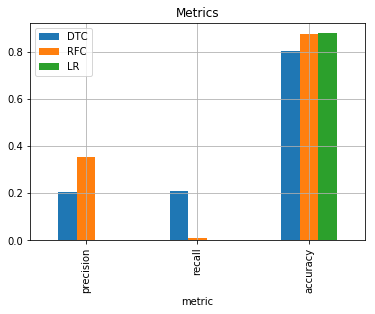

In [229]:
%matplotlib inline
from matplotlib import pyplot as plt
#plt.figure(figsize=(5, 5))
df_metrics.plot.bar(x='metric')
plt.grid(True)
plt.title('Metrics')
#plt.xlim((-0.01, 1.01))
#plt.ylim((-0.01, 1.01))

In [230]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе

# Ваш код :-)

In [231]:
from sklearn.metrics import roc_auc_score, roc_curve

In [246]:
dtc = DecisionTreeClassifier()  
dtc.fit(X_train, y_train)
dtc_predict = dtc.predict_proba(X_test)

In [259]:
rfc = RandomForestClassifier()  
rfc.fit(X_train, y_train)
rfc_predict = rfc.predict_proba(X_test)

In [248]:
lr = LogisticRegression()  
lr.fit(X_train, y_train)
lr_predict = lr.predict_proba(X_test)

In [249]:
dtc_fpr, dtc_tpr, dtc_thresholds = roc_curve(y_test, dtc_predict[:,1]) 
rfc_fpr, rfc_tpr, rfc_thresholds = roc_curve(y_test, rfc_predict[:,1]) 
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_predict[:,1]) 

(-0.01, 1.01)

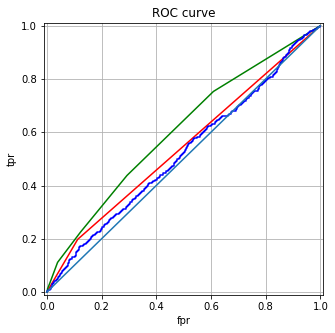

In [250]:
plt.figure(figsize=(5, 5))
plt.plot(dtc_fpr, dtc_tpr, color = 'red')
plt.plot(rfc_fpr, rfc_tpr, color = 'green')
plt.plot(lr_fpr, lr_tpr, color = 'blue')
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [251]:
print ('ROC_AUC DTC: {}', format(roc_auc_score(y_test, dtc_predict_proba[:,1])))
print ('ROC_AUC RFC: {}', format(roc_auc_score(y_test, rfc_predict_proba[:,1])))
print ('ROC_AUC LR: {}', format(roc_auc_score(y_test, lr_predict_proba[:,1])))

ROC_AUC DTC: {} 0.5480203533543514
ROC_AUC RFC: {} 0.5926365048997153
ROC_AUC LR: {} 0.5191115841664197


In [252]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

# Ваш код :-)

In [253]:
dtc = DecisionTreeClassifier() 
print ('DTC roc_auc val: {}', format(cross_val_score(
    dtc,
    train2,
    y,
    scoring='roc_auc',
    cv=10   #Количество частей
).mean()))

DTC roc_auc val: {} 0.5258647416356115


In [254]:
rfc = RandomForestClassifier()
print ('RFC roc_auc val: {}', format(cross_val_score(
    rfc,
    train2,
    y,
    scoring='roc_auc',
    cv=10   #Количество частей
).mean()))

RFC roc_auc val: {} 0.5786692099815424


In [255]:
lr = LogisticRegression()
print ('LR roc_auc val: {}', format(cross_val_score(
    lr,
    train2,
    y,
    scoring='roc_auc',
    cv=10   #Количество частей
).mean()))

LR roc_auc val: {} 0.5043667634102675


In [256]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки

# Ваш код :-)

## Лучшая RFC

In [260]:
rfc = RandomForestClassifier()  
rfc.fit(X_train, y_train)
rfc_predict = rfc.predict_proba(X_test)

In [261]:
rfc_fpr, rfc_tpr, rfc_thresholds = roc_curve(y_test, rfc_predict_proba[:,1]) 

(-0.01, 1.01)

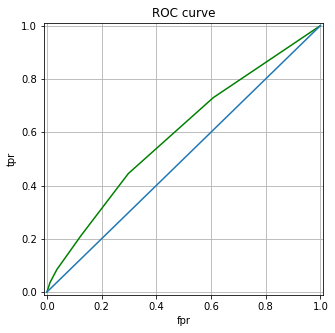

In [262]:
plt.figure(figsize=(5, 5))
plt.plot(rfc_fpr, rfc_tpr, color = 'green')
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))